# Model Graph

Here we programatically generate a "model graph" for two different moels. The graphs show the linkages between all the model components and files.

The graph uses pydot and IPython packages as optional dependencies of pynhm.

In [1]:
import pathlib as pl 
from pprint import pprint
import pynhm
import tempfile

Make a temp dir that combines PRMS inputs and outputs as potential "inputs" to pynhm.

In [2]:
dom_dir = pl.Path("../test_data/drb_2yr")

tmp_dir = pl.Path(tempfile.mkdtemp())
input_dir = tmp_dir / "input"
input_dir.mkdir()
for ff in dom_dir.resolve().glob("*.nc"):
    (input_dir / ff.name).symlink_to(ff)
for ff in (dom_dir / "output").resolve().glob("*.nc"):
    (input_dir / ff.name).symlink_to(ff)

## Example 1: Full NHM

In [3]:
model_1_components = [
    pynhm.PRMSBoundaryLayer,
    pynhm.PRMSSolarGeometry,
    pynhm.PRMSCanopy,
    pynhm.PRMSSnow,
    pynhm.PRMSRunoff,
    pynhm.PRMSSoilzone,
    pynhm.PRMSGroundwater, 
    pynhm.PRMSChannel
]

params = pynhm.PrmsParameters.load(dom_dir / "myparam.param")
control = pynhm.Control.load(dom_dir / "control.test", params=params)
model_1 = pynhm.Model(*model_1_components, control=control, input_dir=input_dir)

A model graph is mostly a visualization of the following attribute of a model. 

In [4]:
pprint(model_1.component_input_from)

{'PRMSBoundaryLayer': {'prcp': PosixPath('/var/folders/rf/pj_9dt9x55b9gfnv34f3xktc0000gn/T/tmpirmwl4bz/input/prcp.nc'),
                       'tmax': PosixPath('/var/folders/rf/pj_9dt9x55b9gfnv34f3xktc0000gn/T/tmpirmwl4bz/input/tmax.nc'),
                       'tmin': PosixPath('/var/folders/rf/pj_9dt9x55b9gfnv34f3xktc0000gn/T/tmpirmwl4bz/input/tmin.nc')},
 'PRMSCanopy': {'hru_ppt': 'PRMSBoundaryLayer',
                'hru_rain': 'PRMSBoundaryLayer',
                'hru_snow': 'PRMSBoundaryLayer',
                'pkwater_ante': 'PRMSSnow',
                'potet': 'PRMSBoundaryLayer',
                'transp_on': 'PRMSBoundaryLayer'},
 'PRMSChannel': {'gwres_flow': 'PRMSGroundwater',
                 'sroff': 'PRMSRunoff',
                 'ssres_flow': 'PRMSSoilzone'},
 'PRMSGroundwater': {'dprst_seep_hru': 'PRMSRunoff',
                     'soil_to_gw': 'PRMSSoilzone',
                     'ssr_to_gw': 'PRMSSoilzone'},
 'PRMSRunoff': {'hru_intcpevap': 'PRMSCanopy',
            

Before plotting, let's choose a color scheme. [Colorbrewer](https://colorbrewer2.org/) palettes are implemented as a class/closure in pynhm

In [5]:
cb = pynhm.ColorBrewer()
palette = cb.get_palette('Accent')(len(model_1_components))
cb.jupyter_palette(palette)

<span style="font-family: monospace">#7fc97f <span style="color: #7fc97f">████████</span></span><br><span style="font-family: monospace">#beaed4 <span style="color: #beaed4">████████</span></span><br><span style="font-family: monospace">#fdc086 <span style="color: #fdc086">████████</span></span><br><span style="font-family: monospace">#ffff99 <span style="color: #ffff99">████████</span></span><br><span style="font-family: monospace">#386cb0 <span style="color: #386cb0">████████</span></span><br><span style="font-family: monospace">#f0027f <span style="color: #f0027f">████████</span></span><br><span style="font-family: monospace">#bf5b17 <span style="color: #bf5b17">████████</span></span><br><span style="font-family: monospace">#666666 <span style="color: #666666">████████</span></span>

Map these on to the component/class names in a way that might make some sense.

In [6]:
component_colors = {
    'PRMSSolarGeometry': palette[3],
    'PRMSBoundaryLayer': palette[2], 
    'PRMSCanopy': palette[0],
    'PRMSSnow': palette[1],
    'PRMSRunoff': palette[5],
    'PRMSSoilzone': palette[6],
    'PRMSGroundwater': palette[7],
    'PRMSChannel': palette[4],    
}
cb.jupyter_palette(component_colors)

<span style="font-family: monospace">PRMSSolarGeometry <span style="color: #ffff99">████████</span></span><br><span style="font-family: monospace">PRMSBoundaryLayer <span style="color: #fdc086">████████</span></span><br><span style="font-family: monospace">PRMSCanopy <span style="color: #7fc97f">████████</span></span><br><span style="font-family: monospace">PRMSSnow <span style="color: #beaed4">████████</span></span><br><span style="font-family: monospace">PRMSRunoff <span style="color: #f0027f">████████</span></span><br><span style="font-family: monospace">PRMSSoilzone <span style="color: #bf5b17">████████</span></span><br><span style="font-family: monospace">PRMSGroundwater <span style="color: #666666">████████</span></span><br><span style="font-family: monospace">PRMSChannel <span style="color: #386cb0">████████</span></span>

Displaying SVG written to temp file: /var/folders/rf/pj_9dt9x55b9gfnv34f3xktc0000gn/T/tmp5ei7z0uz


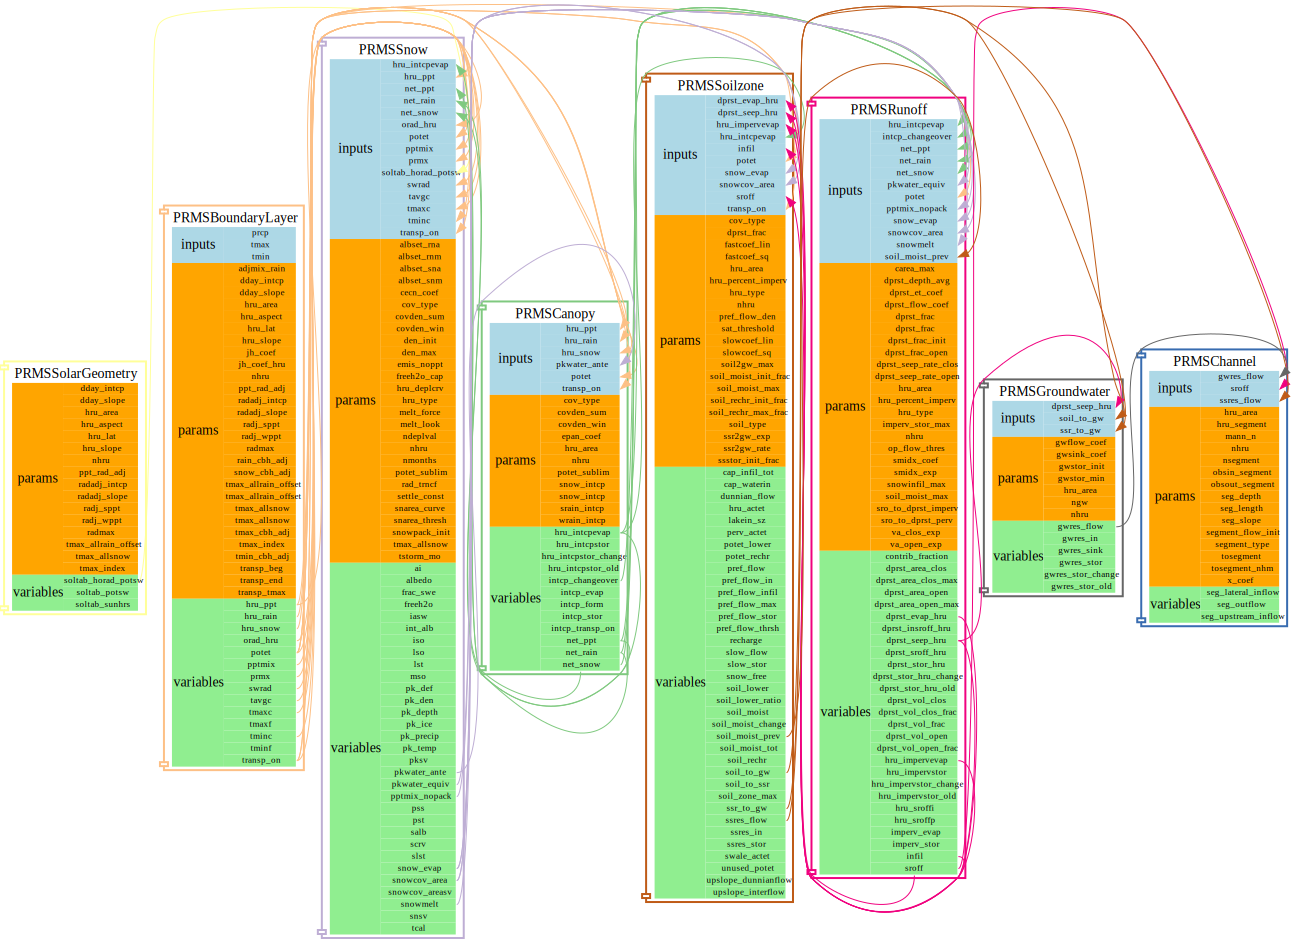

In [7]:
model_1_graph = pynhm.analysis.ModelGraph(model_1, component_colors=component_colors, show_params=True)
model_1_graph.SVG(verbose=True)

## Example 2: Arbitrary submodel
This may not really make sense, but it shows modularity.

In [8]:
model_2_components = [
    pynhm.PRMSBoundaryLayer,
    pynhm.PRMSSnow,
    pynhm.PRMSRunoff,
]

params = pynhm.PrmsParameters.load(dom_dir / "myparam.param")
control = pynhm.Control.load(dom_dir / "control.test", params=params)
model_2 = pynhm.Model(*model_2_components, control=control, input_dir=input_dir)

In [9]:
model_2_graph = pynhm.analysis.ModelGraph(model_2, component_colors=component_colors)  # dont snow parameters by default

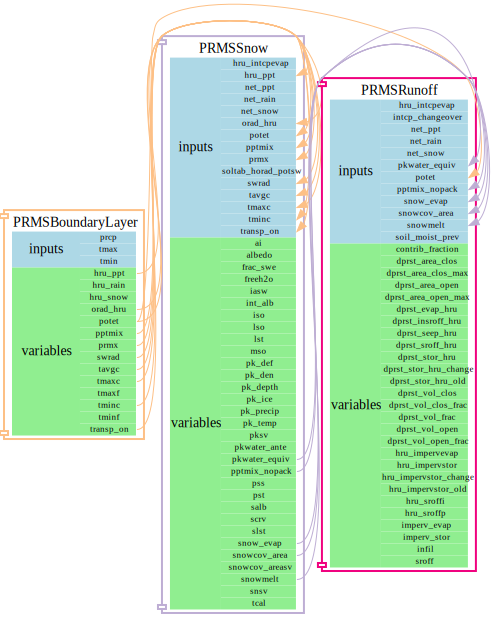

In [10]:
model_2_graph.SVG()

In [11]:
model_2_graph.component_nodes

{'PRMSBoundaryLayer': <pydot.Node at 0x11c179360>,
 'PRMSSnow': <pydot.Node at 0x1175e6a70>,
 'PRMSRunoff': <pydot.Node at 0x11b836920>}

In [12]:
print(model_2_graph.component_nodes['PRMSRunoff'])

PRMSRunoff [color="#f0027f", label=<<TABLE BORDER="0" CELLBORDER=".5" CELLSPACING="0" CELLPADDING="1">
    <TR><TD COLSPAN="6">PRMSRunoff</TD></TR>
    <TR>
        <TD COLSPAN="2" ROWSPAN="13"         BGCOLOR="lightblue">inputs</TD>
    </TR>
    <TR>
        <TD COLSPAN="4"  BGCOLOR="lightblue" PORT="hru_intcpevap"><FONT POINT-SIZE="9.0">hru_intcpevap</FONT></TD>
    </TR>
    <TR>
        <TD COLSPAN="4"  BGCOLOR="lightblue" PORT="intcp_changeover"><FONT POINT-SIZE="9.0">intcp_changeover</FONT></TD>
    </TR>
    <TR>
        <TD COLSPAN="4"  BGCOLOR="lightblue" PORT="net_ppt"><FONT POINT-SIZE="9.0">net_ppt</FONT></TD>
    </TR>
    <TR>
        <TD COLSPAN="4"  BGCOLOR="lightblue" PORT="net_rain"><FONT POINT-SIZE="9.0">net_rain</FONT></TD>
    </TR>
    <TR>
        <TD COLSPAN="4"  BGCOLOR="lightblue" PORT="net_snow"><FONT POINT-SIZE="9.0">net_snow</FONT></TD>
    </TR>
    <TR>
        <TD COLSPAN="4"  BGCOLOR="lightblue" PORT="pkwater_equiv"><FONT POINT-SIZE="9.0">pkwater_equiv<

In [13]:
print(model_2_graph.graph)

digraph G {
engine=neato;
PRMSBoundaryLayer [color="#fdc086", label=<<TABLE BORDER="0" CELLBORDER=".5" CELLSPACING="0" CELLPADDING="1">
    <TR><TD COLSPAN="6">PRMSBoundaryLayer</TD></TR>
    <TR>
        <TD COLSPAN="2" ROWSPAN="4"         BGCOLOR="lightblue">inputs</TD>
    </TR>
    <TR>
        <TD COLSPAN="4"  BGCOLOR="lightblue" PORT="prcp"><FONT POINT-SIZE="9.0">prcp</FONT></TD>
    </TR>
    <TR>
        <TD COLSPAN="4"  BGCOLOR="lightblue" PORT="tmax"><FONT POINT-SIZE="9.0">tmax</FONT></TD>
    </TR>
    <TR>
        <TD COLSPAN="4"  BGCOLOR="lightblue" PORT="tmin"><FONT POINT-SIZE="9.0">tmin</FONT></TD>
    </TR>
    <TR>
        <TD COLSPAN="2" ROWSPAN="15"         BGCOLOR="lightgreen">variables</TD>
    </TR>
    <TR>
        <TD COLSPAN="4"  BGCOLOR="lightgreen" PORT="hru_ppt"><FONT POINT-SIZE="9.0">hru_ppt</FONT></TD>
    </TR>
    <TR>
        <TD COLSPAN="4"  BGCOLOR="lightgreen" PORT="hru_rain"><FONT POINT-SIZE="9.0">hru_rain</FONT></TD>
    </TR>
    <TR>
        <TD 